In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.signal import find_peaks

In [48]:
data = pd.read_csv("20231102_AM23NMC00007_CU.csv")

In [49]:
data['Capacity [As]'] = (data['Current[A]'][0:-1] * np.diff(data['Testtime [s]'])).cumsum()
data['SOC'] = (data['Capacity [As]']+abs(min(data['Capacity [As]'])))/max(data['Capacity [As]']+abs(min(data['Capacity [As]']))) # Calculate the SOC and add it to the df

In [50]:
# Step 1：filter the data
filtered_data = data[(data['StepID'] >= 6) & (data['StepID'] <= 9)]

# Step 2：extract the column
filtered_data = filtered_data[[ 'StepID', 'Testtime [s]', 'Voltage[V]', 'Current[A]', 'SOC']]

# Step 3：Saving the extracted data to a new CSV file
output_file_path = 'filtered_data.csv'
filtered_data.to_csv(output_file_path, index=False)

print(f"Data has been saved to {output_file_path}")


Data has been saved to filtered_data.csv


In [51]:
filtered_data.shape[0]

63519

In [52]:
# ocv extract
df = pd.read_csv("filtered_data.csv")

#extract data of current and steptime
df_ocv_ex = df[['Testtime [s]', 'Voltage[V]']]

#save the extracted data to the file
df_ocv_ex.to_csv("data/data_ocv_ex.csv", index=False)



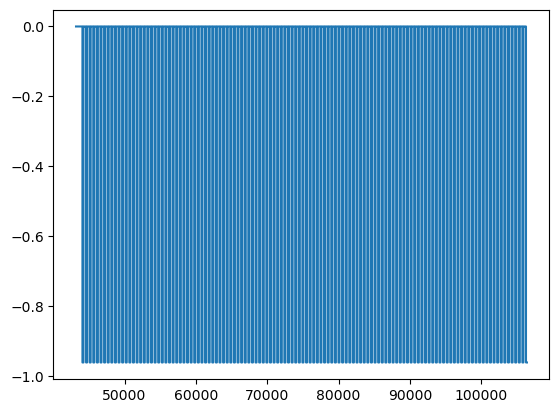

In [53]:
plt.plot(df['Testtime [s]'], df['Current[A]'])

In [54]:
voltage = df['Voltage[V]'].values
peaks, _ = find_peaks(voltage, distance=170)

In [55]:
peak_voltages = voltage[peaks]
peak_currents = df['Current[A]'].values[peaks]
peak_testtimes = df['Testtime [s]'].values[peaks]
step_id = df['StepID'].values[peaks]

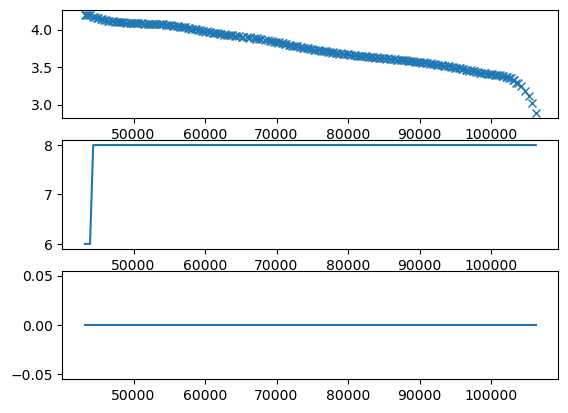

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=1)
axs[0].plot(peak_testtimes, peak_voltages, "x")
axs[1].plot(peak_testtimes, step_id)
axs[2].plot(peak_testtimes, peak_currents)
plt.show()

In [57]:
peak_voltages.shape[0]

241

In [58]:
df_peak = pd.DataFrame()
df_peak['StepID'] = step_id
df_peak['Testtime [s]'] = peak_testtimes
df_peak['Current[A]'] = peak_currents
df_peak['Voltage[V]'] = peak_voltages
df_peak.to_csv("peak_data.csv", index=False)

In [59]:
new_time = np.arange(0, len(df_peak['Testtime [s]']))
df_peak['Testtime [s]'] = new_time

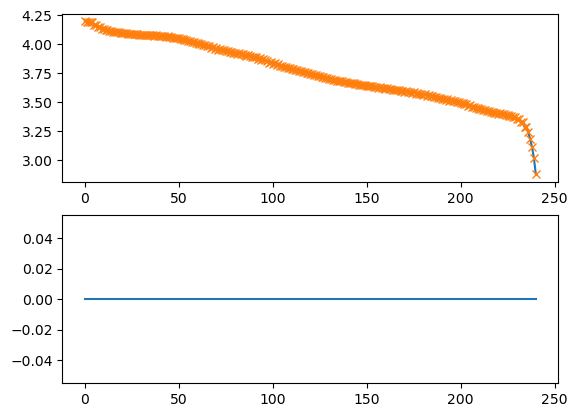

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=1)
axs[0].plot(df_peak['Testtime [s]'], df_peak['Voltage[V]'])
axs[0].plot(df_peak['Testtime [s]'], df_peak['Voltage[V]'], "x")
axs[1].plot(df_peak['Testtime [s]'], df_peak['Current[A]'])